In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### **1. Preparing Dataset:**

In [ ]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

In [ ]:
X

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [ ]:
Y

tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
         3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
        -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
         6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
        -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
        -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
        -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
        -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
         1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
         7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
        -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
         6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
         5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
        -7.5602e+01,  1.9713e+01, -7.1601e+01, -1.9

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
Y.shape

torch.Size([100])

In [ ]:
Y = Y.view(Y.shape[0],1) # reshaping & resizing --> converting to column vector



In [ ]:
Y.shape

torch.Size([100, 1])

In [ ]:
n_samples, n_features = X.shape

input_size = n_features
output_size = 1

### **Phase 2: Constructing Model, Loss & Optimizer**

In [ ]:
model = nn.Linear(input_size,output_size) #creating model for forward pass

In [ ]:
loss_fn = nn.MSELoss() #Loss function creation

In [ ]:
learning_rate = 0.001
n_iters = 10000

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate) # model.parameters() --> weights + biases taken care of


In [ ]:
# Training Loop

for epoch in range(n_iters):

  Y_pred = model(X)  # Forward pass and prediction

  loss_val = loss_fn(Y_pred,Y) # Loss value computation

  loss_val.backward() # Gradient computation

  optimizer.step() # Updating weights from gradients

  optimizer.zero_grad() # Resetting gradients

  if((epoch+1)%2000 ==0):
    print(f'Epoch #{epoch+1} loss = {loss_val:.8f}')

Epoch #2000 loss = 342.76022339
Epoch #4000 loss = 332.58847046
Epoch #6000 loss = 332.56756592
Epoch #8000 loss = 332.56756592
Epoch #10000 loss = 332.56756592


### **Detaching The Output From Computational Graph + Plotting**

##### *No o/p will be backpropagated. Similar to [model.no_grad()](https://stackoverflow.com/questions/56816241/difference-between-detach-and-with-torch-nograd-in-pytorch) --> except that no_grad will set requires_flag=False temporarily; mentioning that no operation should build the graph.*

In [ ]:
Y_Predicted_Final = model(X).detach().numpy()


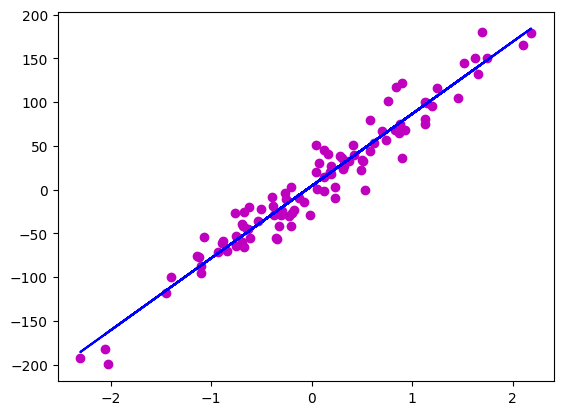

In [ ]:
plt.plot(X_numpy, Y_numpy, 'mo')
plt.plot(X_numpy, Y_Predicted_Final, 'b')
plt.show()